# 1 - Transformations

1. one very usefull transformation to take care of variable seasonality strength (different sizes of spikes on the chart) is the BOX=COX         transformation. 
2. It uses lambda to tune its strength: 1 for no change, and 0 for log transformation.
3. Lambda can be tuned automatically using Guerrero transformation, however if close to zero, the simple log transformation is preferrable due to very easy interpretability

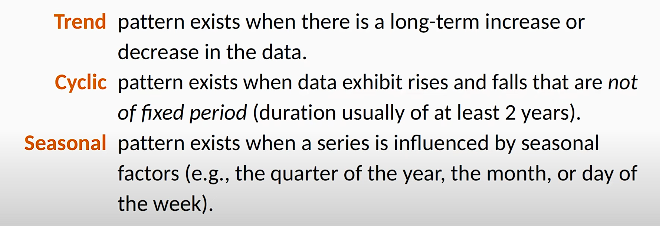

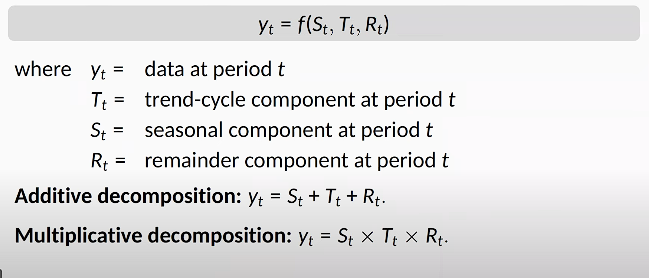

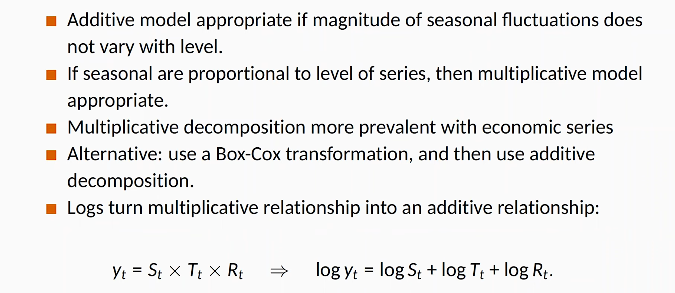

In [24]:
import pandas as pd

data_emp = pd.read_csv('../data-raw/US_employment/US_employment_fpp3_Monthly.txt', delimiter='\t')
data_emp

,observation_date,CEU0500000001_20191004,CEU0600000001_20191004,CEU0800000001_20191004,CEU1000000001_20191004,CEU1011330001_20191004,CEU1021000001_20191004,CEU1021100001_20191004,CEU1021200001_20191004,CEU1021210001_20191004,...,CEU9091100001_20191004,CEU9091912001_20191004,CEU9092000001_20191004,CEU9092161101_20191004,CEU9092200001_20191004,CEU9093000001_20191004,CEU9093161101_20191004,CEU9093200001_20191004,PAYNSA_20191004,TEMPHELPN_20191004
0,1939-01-01,25338,10806,14532,885,NaN,NaN,NaN,NaN,NaN,...,584.9,315.2,NaN,NaN,NaN,NaN,NaN,NaN,29296,NaN
1,1939-02-01,25447,10917,14530,882,NaN,NaN,NaN,NaN,NaN,...,596.3,313.1,NaN,NaN,NaN,NaN,NaN,NaN,29394,NaN
2,1939-03-01,25833,11150,14683,883,NaN,NaN,NaN,NaN,NaN,...,601.5,311.1,NaN,NaN,NaN,NaN,NaN,NaN,29804,NaN
3,1939-04-01,25801,10978,14823,614,NaN,NaN,NaN,NaN,NaN,...,605.8,313.1,NaN,NaN,NaN,NaN,NaN,NaN,29786,NaN
4,1939-05-01,26113,11143,14970,719,NaN,NaN,NaN,NaN,NaN,...,624.6,312.1,NaN,NaN,NaN,NaN,NaN,NaN,30145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2019-05-01,128771,21108,107663,754,45.5,708.7,156.6,196.9,52.9,...,2206.4,607.4,5166.0,2464.4,2701.9,14859.0,8302.8,6555.8,151610,3009.5
965,2019-06-01,129800,21387,108413,762,47.7,713.9,160.5,199.1,53.0,...,2225.3,606.4,4906.0,2188.9,2717.0,14705.0,7941.7,6763.3,152243,3025.7
966,2019-07-01,129883,21438,108445,762,48.7,713.3,161.6,197.2,51.9,...,2228.2,607.3,4843.0,2123.8,2718.9,13607.0,6792.6,6814.7,151169,2965.9
967,2019-08-01,129930,21451,108479,760,50.3,710.1,164.0,197.1,53.1,...,2253.8,604.7,4923.0,2198.8,2724.0,13875.0,7130.0,6745.0,151587,3040.0


In [25]:
data_filtered = data_emp[['CEU0500000001_20191004','observation_date']].set_index('observation_date')
data_filtered = data_filtered[data_filtered.index >= '1990-01-01']
data_filtered.index = pd.DatetimeIndex(data_filtered.index).to_period('M')
data_filtered

,CEU0500000001_20191004
observation_date,
1990-01,89455
1990-02,89598
1990-03,90053
1990-04,90634
1990-05,91308
...,...
2019-05,128771
2019-06,129800
2019-07,129883


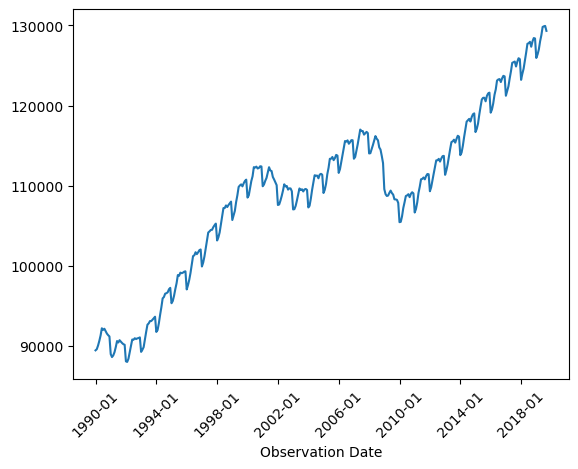

In [26]:
import matplotlib.pyplot as plt

plt.plot(data_filtered.index.astype(str), data_filtered['CEU0500000001_20191004'])
plt.xlabel('Observation Date')
plt.xticks(rotation=45)
plt.xticks(range(0, len(data_filtered.index), 48), data_filtered.index[::48])
plt.show()

In [39]:
data_filtered

,CEU0500000001_20191004
observation_date,
1990-01,89455
1990-02,89598
1990-03,90053
1990-04,90634
1990-05,91308
...,...
2019-05,128771
2019-06,129800
2019-07,129883


In [30]:
date_range = pd.date_range(start="2020-01-01", periods=100, freq="M")
data_filtered_test = pd.Series(10 + np.sin(2 * np.pi * date_range.month / 12) + np.random.normal(0, 0.5, len(date_range)), index=date_range)
data_filtered_test

C:\Users\wojci\AppData\Local\Temp\ipykernel_4568\654704014.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2020-01-01", periods=100, freq="M")


2020-01-31     9.792315
2020-02-29    10.655703
2020-03-31    10.828643
2020-04-30    10.464887
2020-05-31    10.419357
                ...    
2027-12-31    10.192659
2028-01-31    10.058071
2028-02-29    10.942888
2028-03-31    11.029104
2028-04-30    10.294540
Freq: ME, Length: 100, dtype: float64

1990-01-31   NaN
1990-02-28   NaN
1990-03-31   NaN
1990-04-30   NaN
1990-05-31   NaN
              ..
2019-05-31   NaN
2019-06-30   NaN
2019-07-31   NaN
2019-08-31   NaN
2019-09-30   NaN
Freq: ME, Name: CEU0500000001_20191004, Length: 357, dtype: float64

C:\Users\wojci\AppData\Local\Temp\ipykernel_4568\222693172.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="1990-01-01", periods=357, freq="M")


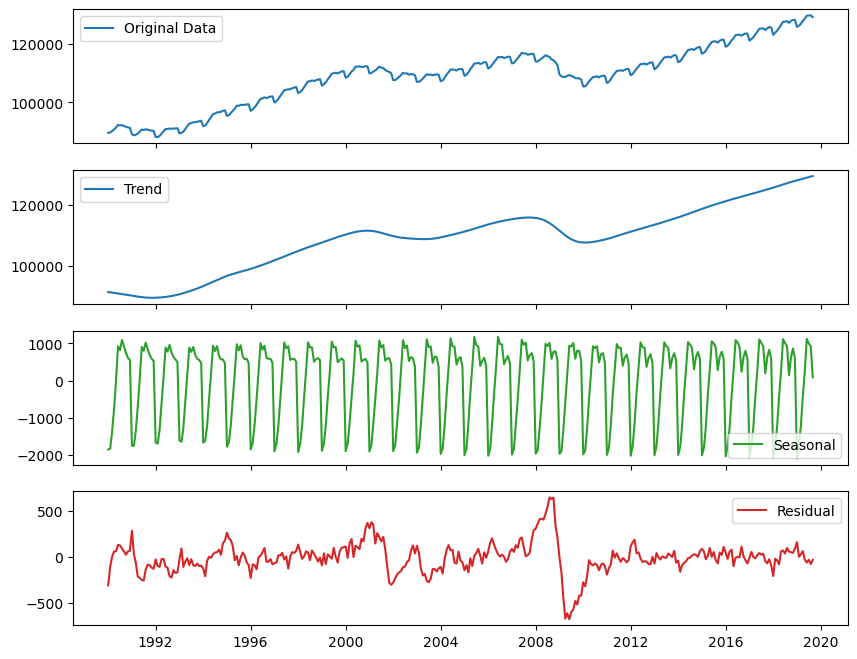

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

date_range = pd.date_range(start=data_filtered.index[0].to_timestamp(), freq="ME", periods=357)
data_filtered_series = pd.Series(data_filtered['CEU0500000001_20191004'], index=date_range)

data_filtered.index = pd.to_datetime(data_filtered.index.to_timestamp())

# Example time series data
np.random.seed(42)
date_range = pd.date_range(start="1990-01-01", periods=357, freq="M")

# Perform STL decomposition (equivalent to default STL in R)
stl = STL(data_filtered, seasonal=7)  # 7-point seasonal smoothing (adjust if needed)
result = stl.fit()

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(data_filtered, label="Original Data")
axes[0].legend()

axes[1].plot(trend, label="Trend", color="tab:blue")
axes[1].legend()

axes[2].plot(seasonal, label="Seasonal", color="tab:green")
axes[2].legend()

axes[3].plot(residual, label="Residual", color="tab:red")
axes[3].legend()

plt.show()


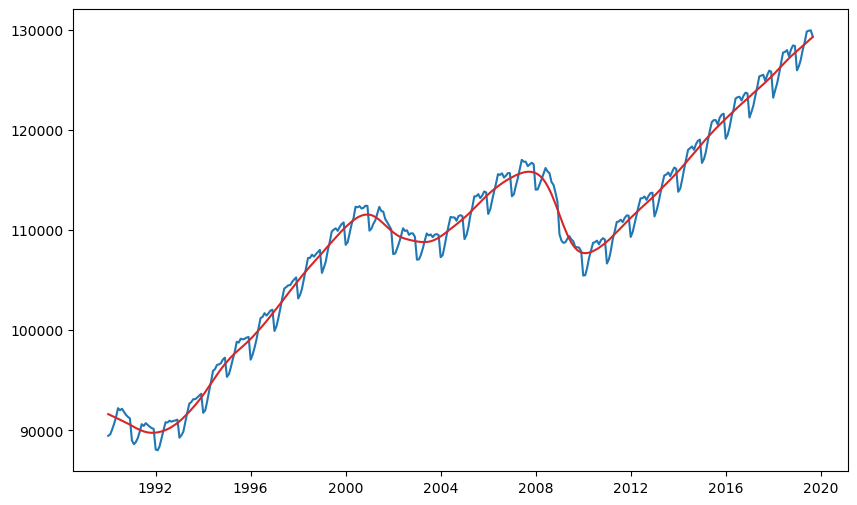

In [43]:
fig = plt.figure(figsize=(10, 6))
plt.plot(data_filtered, label="Original Data")
plt.plot(trend, label="Trend", color="tab:red")
plt.show()